<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/6_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Digital
### October 25th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 04/10/2021




## Configuration

### Clone the GIT

In [ ]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 2242, done.
remote: Counting objects: 100% (2242/2242), done.
remote: Compressing objects: 100% (1642/1642), done.
remote: Total 2242 (delta 1233), reused 1258 (delta 571), pack-reused 0
Receiving objects: 100% (2242/2242), 91.79 MiB | 26.01 MiB/s, done.
Resolving deltas: 100% (1233/1233), done.


### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

### Importa moduli [no COLAB]

In [1]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


### Importa moduli [COLAB]

In [ ]:
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle #Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

     |████████████████████████████████| 98 kB 3.4 MB/s eta 0:00:011


### Funzioni per l'importazione file Tektronix

In [2]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

Digital

## Set Reset

5.1   5.1   3.6   3.5


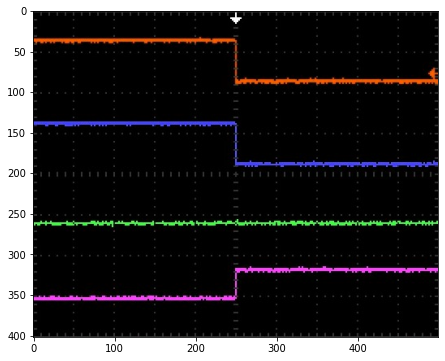

In [52]:
from scipy.stats import gaussian_kde
import cv2
img = cv2.imread(f'{DATADIR}/25-10-21/fronte1-RS-crop.JPG',1)
img = cv2.bitwise_not(img)

fig, ax = plt.subplots(figsize=(8, 6))

ax.imshow(img)
y1 = 301
y2 = 311
x1 = 99
x2 = 109
fs_t = 20*10**-3 #s

fs_V = 1 #V

S1 = 36
S2 = 87
b=101
R1 = S1+b
R2 = S2+b
Q1 = 321 #misurati su fronte1_rs
Q2 = 285 #misurati su fronte1_rs
Q_1 = 319
Q_2 = 354
pp1 = abs(S1-S2)*fs_V/abs(x2-x1)
pp2 = abs(R1-R2)*fs_V/abs(x2-x1)
pp3 = abs(Q1-Q2)*fs_V/abs(x2-x1)
pp4 = abs(Q_1-Q_2)*fs_V/abs(x2-x1)
print(pp1,' ',pp2,' ',pp3,' ',pp4)


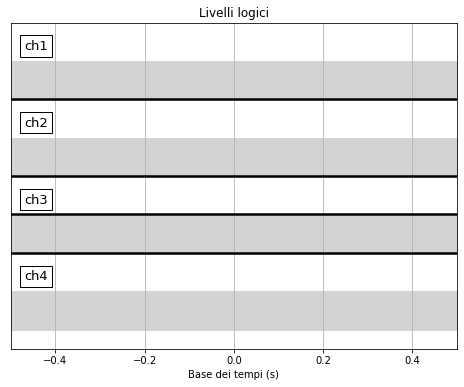

In [65]:
time_div = 0.1 #s
clock_fq = 5   #Hz
clk = 1./clock_fq

timebase = np.linspace(time_div * -5., time_div * 5., 500)

def plotLogicLevel_noclk(ch1, ch1_name, ch2, ch2_name, ch3, ch3_name, ch4, ch4_name, timebase, time_div ):
   
   fig, ax  = plt.subplots(figsize=(8,6))
   ax.plot(timebase, ch4 , color="black", linewidth=2.5)
   ax.plot(timebase, ch3 - 1, color="black", linewidth=2.5)
   ax.plot(timebase, ch2 + 1, color="black", linewidth=2.5)
   ax.plot(timebase, ch1 + 3, color="black", linewidth=2.5)
   ax.get_yaxis().set_visible(False)
   plt.xlabel("Base dei tempi (s)")
   plt.xlim([time_div * -5., time_div * 5.])
   plt.ylim([-3.5,  5])
   plt.title("Livelli logici")
   
   #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
   #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
   ax.fill_between(timebase, -2, -3, color="lightgray")
   ax.text(-0.47,-2 + 0.3, ch4_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, -1, +0, color="lightgray")
   ax.text(-0.47, + 0.3, ch3_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, +1, +2, color="lightgray")
   ax.text(-0.47, +2 + 0.3, ch2_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, +3, +4, color="lightgray")
   ax.text(-0.47, +4 + 0.3, ch1_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.grid()
    
plotLogicLevel_noclk(np.zeros(500), "ch1", np.zeros(500), "ch2", np.zeros(500), "ch3", np.zeros(500), "ch4", timebase,0.1)

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

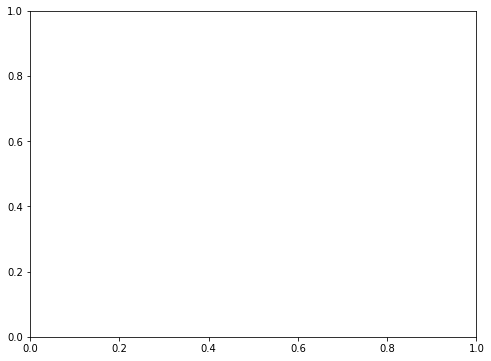

In [66]:
ch1 = np.heaviside(0, 1)
ch2 = np.heaviside(timebase + 0 * clk, 1) * np.heaviside(-1 * timebase + 1 * clk, 1) 
ch3 = np.heaviside(timebase - 1 * clk, 1) * np.heaviside(-1 * timebase + 2 * clk, 1) 
ch4 = np.heaviside(0, 1)



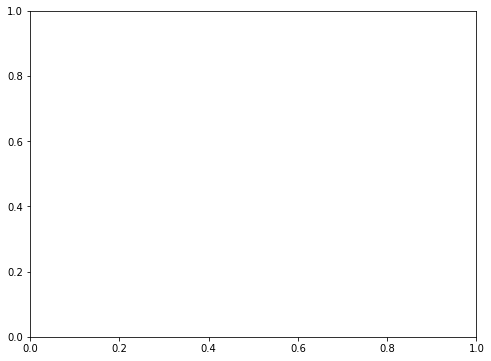

In [6]:
import cv2
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))

filename = 'line.jpg'
img = cv2.imread(f'{DATADIR}/25-10-21/fronte1-RS-crop.JPG')
#cv2.imshow('img.jpg',img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray.jpg',gray)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#cv2.imshow('hsv.jpg', hsv)

h, s, v = cv2.split(hsv)
ret,th = cv2.threshold(s,127,255, 0)
#cv2.imshow('th.jpg', th)

lines = cv2.HoughLinesP(th,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

#cv2.imshow('HoughLines.jpg',img)

#cv2.waitKey(0)
#cv2.destroyAllWindows()



## Ring oscillator

In [40]:
in_osc = pd.read_csv(f'{DATADIR}/25-10-21/ring-oscillator.csv')

time_osc = in_osc.to_numpy().transpose()[0]
sign_osc = in_osc.to_numpy().transpose()[1]


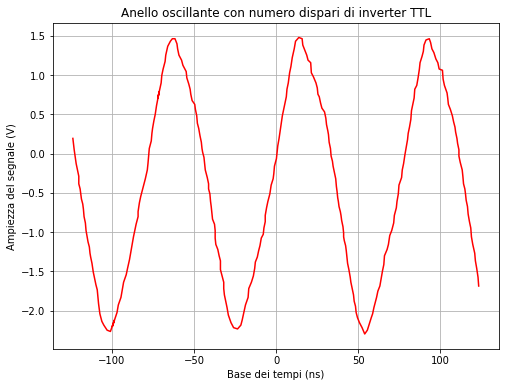

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time_osc, sign_osc, color = "red", label = "Segnale oscillante ")
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (V)',
       title='Anello oscillante con numero dispari di inverter TTL')

ax.grid()

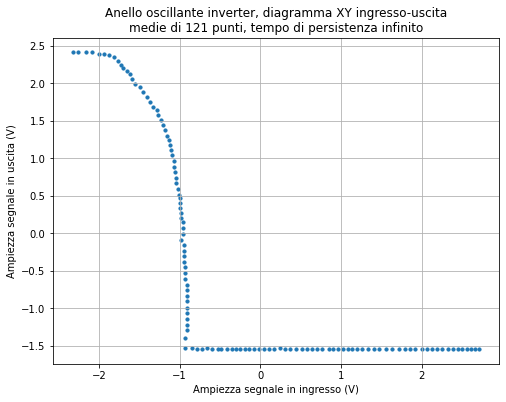

In [49]:
oscXY = pd.read_csv(f'{DATADIR}/25-10-21/XY-inVSout-NOT.csv')
x_data = oscXY.to_numpy().transpose()[0]    #Offset traslazione canali
y_data = oscXY.to_numpy().transpose()[1]   #Offset traslazione canali

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 6))
ax.scatter(x_data, y_data, s=10)

ax.set(xlabel='Ampiezza segnale in ingresso (V)', ylabel='Ampiezza segnale in uscita (V)',
       title='Anello oscillante inverter, diagramma XY ingresso-uscita\nmedie di 121 punti, tempo di persistenza infinito')

ax.grid()

plt.savefig(f"{OUTPUTDIR}/OPA-log-AMP-XY.pdf")


## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 

[Errno 2] No such file or directory: '/content/Electronics-2021-UNITO/'
/home/berz/Documents/ANNO_3/LAB_E/GIT/Electronics-2021-UNITO/analysis
hint: Pulling without specifying how to reconcile divergent branches is
hint: discouraged. You can squelch this message by running one of the following
hint: commands sometime before your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
Username for 'https://github.com': 